Loading necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

Loading dataset and checking basic details/null values

In [2]:
data = pd.read_csv('titanic_dataset .csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#dropping 'Cabin' column as it has more than 75% nan values
data.drop(['Cabin'], inplace = True, axis =1)

In [8]:
#using mode to fill nan in 'embarked' column as it is an object variable
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [10]:
#using mean to fill 'Age' column
data['Age'] = data['Age'].fillna(data['Age'].mean())

Since our target variable is 'Survived', we can keep only those variables that affect the value of target column. Hence deleting 'Name', 'PassengerId', 'Ticket', 'Fare' and 'Embarked'

In [11]:
data.drop(['Name', 'PassengerId','Ticket','Fare','Embarked'], inplace = True, axis =1)

Encoding the 'object' variable: 'Sex'

In [12]:
#label encoding
from sklearn.preprocessing import LabelEncoder
x_le = LabelEncoder()
data['Sex'] = x_le.fit_transform(data['Sex'])

In [13]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


Scaling to normalise the values in 'Age' column

In [14]:
#minmax scaling for normalising all column values
from sklearn.preprocessing import MinMaxScaler
x_mmsc = MinMaxScaler()
data_model = x_mmsc.fit(data)
data_scaled = data_model.transform(data)
data_scaled = pd.DataFrame(data_scaled)

In [15]:
#renaming column names of scaled dataset as per original set
data_scaled.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']

Checking heatmap to find out highly correlated redundant columns

<Axes: >

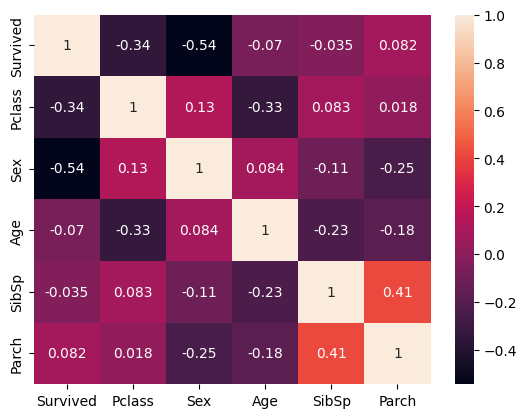

In [16]:
sns.heatmap(data_scaled.corr(), annot = True)

No two columns have high correlation here.

Train-Test splitting after separating dependent and independent features

In [17]:
y = data_scaled['Survived']
X = data_scaled.drop(['Survived'], axis = 1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

k-NN model

In [19]:
from sklearn.neighbors import KNeighborsClassifier
metric_k =[]
neighbors = np.arange(3,15)

In [20]:
for k in neighbors:
  classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski', p =2)
  classifier.fit(X_train, y_train)
  y_pred_knn = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'Accuracy')

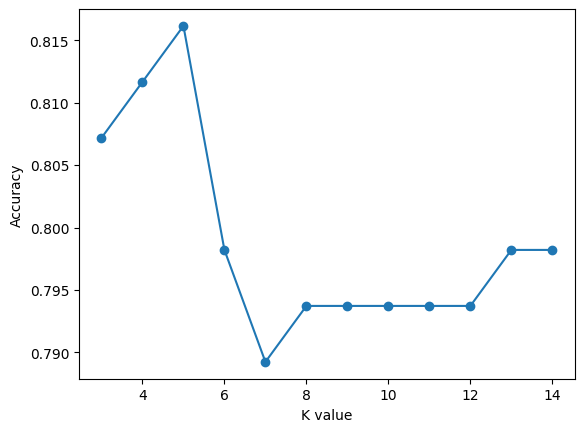

In [21]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')

In [22]:
#found that maximum accuracy is when neighbor value is 5
classifier= KNeighborsClassifier(n_neighbors=5,metric='minkowski', p =2)
knn_model = classifier.fit(X_train, y_train)
y_pred_knn = classifier.predict(X_test)

In [23]:
print('Model score in k-NN', knn_model.score(X_test, y_test))

Model score in k-NN 0.8161434977578476


k-Fold cross validation for k-NN

In [24]:
from sklearn.model_selection import KFold
kfold_validator = KFold(10) #89 in each fold

In [25]:
for train_index, test_index in kfold_validator.split(X, y):
    print("\nTrain index:", train_index)
    print("\nTest index:", test_index)


Train index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 

In [26]:
from sklearn.model_selection import cross_val_score
cv_score_kf = cross_val_score(classifier, X,y, cv = kfold_validator)

In [27]:
print('Score of each fold: ',cv_score_kf) #score for each fold
print('\nAverage accuracy score for k-NN (k-fold):',cv_score_kf.mean()) #mean of all fold scores

Score of each fold:  [0.74444444 0.78651685 0.78651685 0.84269663 0.80898876 0.82022472
 0.82022472 0.7752809  0.88764045 0.82022472]

Average accuracy score for k-NN (k-fold): 0.8092759051186018


Stratified k-fold cross validation for k-NN

In [28]:
from sklearn.model_selection import StratifiedKFold
stratified_cv = StratifiedKFold(n_splits = 10)

In [29]:
for train_index, test_index in stratified_cv.split(X, y):
    print("\nTrain index:", train_index)
    print("\nTest index:", test_index)


Train index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 

In [30]:
cv_score_str = cross_val_score(classifier, X,y, cv = stratified_cv)
print('Score of each fold: ',cv_score_str) #score for each fold
print('\nAverage accuracy score for k-NN (stratified k-fold):',cv_score_str.mean()) #mean of all fold scores

Score of each fold:  [0.75555556 0.79775281 0.75280899 0.84269663 0.83146067 0.80898876
 0.84269663 0.78651685 0.87640449 0.80898876]

Average accuracy score for k-NN (stratified k-fold): 0.8103870162297128


SVM model

In [33]:
from sklearn.svm import SVC
sv_cl = SVC(kernel='rbf') #when 'linear' used -> accuracy decreased
svc_model = sv_cl.fit(X_train,y_train)
y_pred_svm = sv_cl.predict(X_test)

In [34]:
print('Model score in SVM', svc_model.score(X_test, y_test))

Model score in SVM 0.8116591928251121


k-Fold cross validation for SVM

In [35]:
cv_score_kf_SVM = cross_val_score(sv_cl, X,y, cv = kfold_validator)

In [36]:
print('Score of each fold: ',cv_score_kf_SVM) #score for each fold
print('\nAverage accuracy score for SVM (k-fold):',cv_score_kf_SVM.mean()) #mean of all fold scores

Score of each fold:  [0.81111111 0.85393258 0.76404494 0.83146067 0.79775281 0.78651685
 0.78651685 0.7752809  0.86516854 0.79775281]

Average accuracy score for SVM (k-fold): 0.8069538077403247


stratified k-Fold cross validation for SVM

In [37]:
cv_score_str_SVM = cross_val_score(sv_cl, X,y, cv = stratified_cv)

In [38]:
print('Score of each fold: ',cv_score_str_SVM) #score for each fold
print('\nAverage accuracy score for SVM (stratified k-fold):',cv_score_str_SVM.mean()) #mean of all fold scores

Score of each fold:  [0.82222222 0.82022472 0.7752809  0.85393258 0.83146067 0.78651685
 0.80898876 0.78651685 0.83146067 0.79775281]

Average accuracy score for SVM (stratified k-fold): 0.8114357053682897
